In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as s
import statsmodels.formula.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats

In [2]:
tbl = pd.read_excel("C:/Users/RUCHI/Downloads/dummy.xlsx")
tbl

,servicecall,months_since_last_service,type_of_repair,repair_time_in_hours
0,1,2,electrical,2.9
1,2,6,mechanical,3.0
2,3,8,electrical,4.8
3,4,3,mechanical,1.8
4,5,2,electrical,2.9
5,6,7,electrical,4.9
6,7,9,mechanical,4.2
7,8,8,mechanical,4.8
8,9,4,electrical,4.4
9,10,6,electrical,4.5


In [3]:
from statsmodels.formula.api import ols
Reg = ols(formula="repair_time_in_hours ~ months_since_last_service",data=tbl)
Fit1=Reg.fit()
print(Fit1.summary())

                             OLS Regression Results                             
Dep. Variable:     repair_time_in_hours   R-squared:                       0.534
Model:                              OLS   Adj. R-squared:                  0.476
Method:                   Least Squares   F-statistic:                     9.174
Date:                  Tue, 15 Mar 2022   Prob (F-statistic):             0.0163
Time:                          14:43:21   Log-Likelihood:                -10.602
No. Observations:                    10   AIC:                             25.20
Df Residuals:                         8   BIC:                             25.81
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
In

C:\Users\RUCHI\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


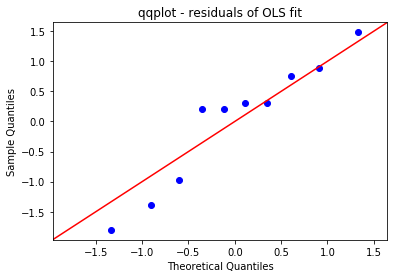

In [4]:
res = Fit1.resid
probplot = s.ProbPlot(res,stats.norm,fit=True)
fig = probplot.qqplot(line='45')
h = plt.title('qqplot - residuals of OLS fit')
plt.show()

CREATING DUMMIES

In [5]:
just_dummies = pd.get_dummies(tbl['type_of_repair'])
just_dummies

,electrical,mechanical
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
5,1,0
6,0,1
7,0,1
8,1,0
9,1,0


In [6]:
step_1 = pd.concat([tbl,just_dummies],axis=1)
step_1

,servicecall,months_since_last_service,type_of_repair,repair_time_in_hours,electrical,mechanical
0,1,2,electrical,2.9,1,0
1,2,6,mechanical,3.0,0,1
2,3,8,electrical,4.8,1,0
3,4,3,mechanical,1.8,0,1
4,5,2,electrical,2.9,1,0
5,6,7,electrical,4.9,1,0
6,7,9,mechanical,4.2,0,1
7,8,8,mechanical,4.8,0,1
8,9,4,electrical,4.4,1,0
9,10,6,electrical,4.5,1,0


In [7]:
step_1.drop(['type_of_repair','mechanical'],inplace=True,axis=1)
step_1

,servicecall,months_since_last_service,repair_time_in_hours,electrical
0,1,2,2.9,1
1,2,6,3.0,0
2,3,8,4.8,1
3,4,3,1.8,0
4,5,2,2.9,1
5,6,7,4.9,1
6,7,9,4.2,0
7,8,8,4.8,0
8,9,4,4.4,1
9,10,6,4.5,1


In [9]:
result = s.OLS(step_1['repair_time_in_hours'],s.add_constant(step_1[['months_since_last_service','electrical']])).fit()
print(result.summary())

                             OLS Regression Results                             
Dep. Variable:     repair_time_in_hours   R-squared:                       0.859
Model:                              OLS   Adj. R-squared:                  0.819
Method:                   Least Squares   F-statistic:                     21.36
Date:                  Tue, 15 Mar 2022   Prob (F-statistic):            0.00105
Time:                          14:52:47   Log-Likelihood:                -4.6200
No. Observations:                    10   AIC:                             15.24
Df Residuals:                         7   BIC:                             16.15
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
co

C:\Users\RUCHI\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [10]:
tbl2 = pd.read_excel("C:/Users/RUCHI/Downloads/dummy2.xlsx")
tbl2

,Employee,Salary,Gender,Experience
0,1,7.5,Male,6
1,2,8.6,Male,10
2,3,9.1,Male,12
3,4,10.3,Male,18
4,5,13.0,Male,30
5,6,6.2,Female,5
6,7,8.7,Female,13
7,8,9.4,Female,15
8,9,9.8,Female,21


Text(0.5, 1.0, 'Simple Linear regression')

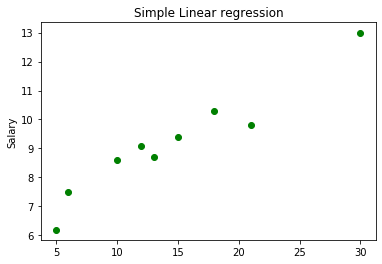

In [11]:
plt.scatter(tbl2['Experience'],tbl2['Salary'],color="green")
plt.ylabel('Salary')
plt.title('Simple Linear regression')

In [12]:
Reg2 = ols(formula="Salary ~ Experience",data = tbl2)
Fit2 = Reg2.fit()
print(Fit2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     87.61
Date:                Tue, 15 Mar 2022   Prob (F-statistic):           3.30e-05
Time:                        15:03:10   Log-Likelihood:                -6.2491
No. Observations:                   9   AIC:                             16.50
Df Residuals:                       7   BIC:                             16.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8093      0.404     14.386      0.0

C:\Users\RUCHI\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


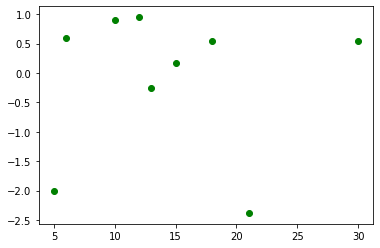

In [13]:
influence = Fit2.get_influence()
resid_student = influence.resid_studentized_external
plt.figure()
plt.scatter(tbl2['Experience'],resid_student,color="green")

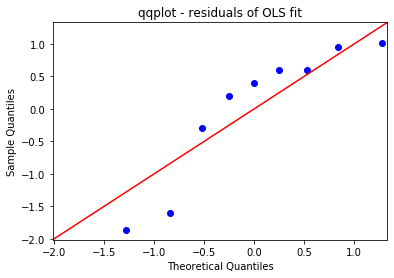

In [14]:
res = Fit2.resid
probplot = s.ProbPlot(res,stats.norm,fit=True)
fig = probplot.qqplot(line='45')
h = plt.title('qqplot - residuals of OLS fit')
plt.show()

In [16]:
just_dummies2 = pd.get_dummies(tbl2['Gender'])
just_dummies2

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,1,0
6,1,0
7,1,0
8,1,0


In [17]:
step_1 = pd.concat([tbl2,just_dummies2],axis=1)
step_1.drop(['Gender','Male'],inplace=True,axis =1)

In [18]:
step_1

,Employee,Salary,Experience,Female
0,1,7.5,6,0
1,2,8.6,10,0
2,3,9.1,12,0
3,4,10.3,18,0
4,5,13.0,30,0
5,6,6.2,5,1
6,7,8.7,13,1
7,8,9.4,15,1
8,9,9.8,21,1


In [19]:
result = s.OLS(step_1['Salary'],s.add_constant(step_1[['Female']])).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.8426
Date:                Tue, 15 Mar 2022   Prob (F-statistic):              0.389
Time:                        15:10:49   Log-Likelihood:                -17.455
No. Observations:                   9   AIC:                             38.91
Df Residuals:                       7   BIC:                             39.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7000      0.853     11.367      0.0

C:\Users\RUCHI\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


In [20]:
result = s.OLS(step_1['Salary'],s.add_constant(step_1[['Experience','Female']])).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     111.6
Date:                Tue, 15 Mar 2022   Prob (F-statistic):           1.80e-05
Time:                        15:11:19   Log-Likelihood:                -1.5752
No. Observations:                   9   AIC:                             9.150
Df Residuals:                       6   BIC:                             9.742
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2485      0.291     21.439      0.0